# Codigo alberto

No possible actions
No possible actions
Goal reached
Goal reached
Goal reached
No possible actions
No possible actions
No possible actions
No possible actions
No possible actions
Goal reached
No possible actions
No possible actions
No possible actions
No possible actions
No possible actions
No possible actions
No possible actions
No possible actions
No possible actions
Goal reached
No possible actions
No possible actions
No possible actions
Goal reached
No possible actions
Goal reached
No possible actions
No possible actions
No possible actions
No possible actions
No possible actions
No possible actions
No possible actions
Goal reached
Goal reached
Goal reached
No possible actions
No possible actions
Goal reached
No possible actions
No possible actions
No possible actions
No possible actions
No possible actions
Goal reached
No possible actions
No possible actions
No possible actions
No possible actions
No possible actions
No possible actions
Goal reached
No possible actions
No possible

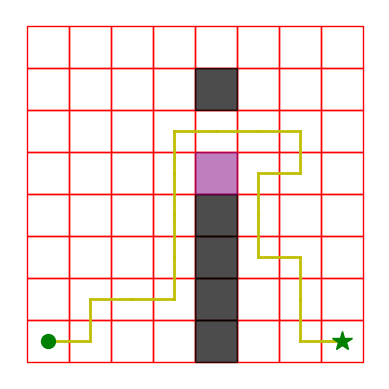

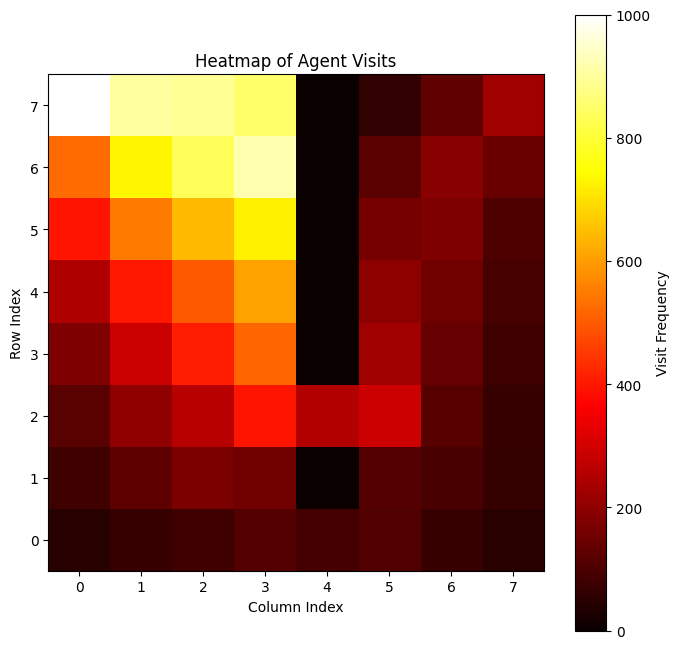

Fixed dead weight position: (3, 4)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def create_grid_dict(n, include_diagonals=False):
    grid = {}
    for i in range(n):
        for j in range(n):
            neighbors = []
            # Direct neighbors
            if i > 0:
                neighbors.append((i-1, j))  # Up
            if i < n-1:
                neighbors.append((i+1, j))  # Down
            if j > 0:
                neighbors.append((i, j-1))  # Left
            if j < n-1:
                neighbors.append((i, j+1))  # Right
            # Diagonal neighbors
            if include_diagonals:
                if i > 0 and j > 0:
                    neighbors.append((i-1, j-1))  # Up-Left
                if i > 0 and j < n-1:
                    neighbors.append((i-1, j+1))  # Up-Right
                if i < n-1 and j > 0:
                    neighbors.append((i+1, j-1))  # Down-Left
                if i < n-1 and j < n-1:
                    neighbors.append((i+1, j+1))  # Down-Right
            grid[(i, j)] = neighbors
    return grid

def get_possible_actions(position, grid_dict, restrictions):
    # Get possible actions excluding wall restrictions and visited positions
    actions = grid_dict[position]
    return [action for action in actions if action not in restrictions]

def plot_grid_with_path(grid_dict, path, position, goal, wall_restrictions, dead_weight=None):
    plt.ioff()  # Turn off interactive mode
    fig, ax = plt.subplots()
    
    # Draw grid squares
    for (i, j) in grid_dict.keys():
        square = plt.Rectangle((j - 0.5, -i - 0.5), 1, 1, fill=None, edgecolor='r')
        ax.add_patch(square)
        
    # Plot wall restrictions
    for (i, j) in wall_restrictions:
        square = plt.Rectangle((j - 0.5, -i - 0.5), 1, 1, color='black', alpha=0.7)
        ax.add_patch(square)

    if dead_weight:
        # Plot dead weight as a filled square
        square = plt.Rectangle((dead_weight[1] - 0.5, -dead_weight[0] - 0.5), 1, 1, color='purple', alpha=0.5)
        ax.add_patch(square)

    # Plot the agent's path
    for i in range(len(path) - 1):
        p1 = path[i]
        p2 = path[i + 1]
        ax.plot([p1[1], p2[1]], [-p1[0], -p2[0]], 'y-', linewidth=2)  # 'y-' means yellow color, solid line

    # Plot the current position as a circle
    ax.plot(position[1], -position[0], 'go', markersize=10)  # 'go' means green color, circle marker

    # Plot the goal as a star
    ax.plot(goal[1], -goal[0], 'g*', markersize=15)  # 'g*' means green color, star marker

    # Set the aspect of the plot to be equal
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()
    plt.ion()  # Turn on interactive mode if needed

def generate_heatmap(heatmap_data):
    plt.figure(figsize=(8, 8))
    plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Visit Frequency')
    plt.title('Heatmap of Agent Visits')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.gca().invert_yaxis()  # Invert y-axis to match grid coordinates
    plt.show()

# Example usage
n = 8
grid_dict = create_grid_dict(n, include_diagonals=False)
wall_restrictions = [(1, 4), (4, 4), (5, 4), (6, 4), (7, 4)]

# Define a fixed dead weight position
dead_weight = (3, 4)  # This is the position that cannot be traversed by the agent

# Initialize heatmap data
heatmap_data = np.zeros((n, n))

# Initialize robot movement
good_paths = []

for rep in range(1000):
    agent_location = (7, 0)
    init_loc = agent_location
    goal = (7, 7)
    max_len_path = 100
    flag = 0
    agent_path = [agent_location]
    restrictions = wall_restrictions.copy()
    restrictions.append(dead_weight)  # Include dead weight as a restriction
    visited_positions = set()  # Set to track visited positions

    while flag == 0:
        visited_positions.add(agent_location)  # Mark the current position as visited
        heatmap_data[agent_location] += 1  # Increment the visit count for this cell
        possible_actions = get_possible_actions(agent_location, grid_dict, restrictions + list(visited_positions))

        max_len_path -= 1

        if len(possible_actions) == 0:
            flag = 1
            print("No possible actions")
        elif agent_location == goal:
            flag = 1
        elif max_len_path == 0:
            flag = 1
            print("max_len_path reached")
        else:
            random.shuffle(possible_actions)
            threshold = 0.5
            p = random.random()
            if p < threshold:
                agent_location = random.choice(possible_actions)
            else:
                # Choose the best action towards the goal
                best_action = max(possible_actions, key=lambda action: -math.dist(action, goal))
                agent_location = best_action

            agent_path.append(agent_location)

        if flag == 1 and agent_location == goal:
            print("Goal reached")
            good_paths.append(agent_path)

# Plot the paths and dead weight
plot_grid_with_path(grid_dict, agent_path, init_loc, goal, wall_restrictions, dead_weight)

# Generate the heatmap
generate_heatmap(heatmap_data)

# Output the fixed dead weight position
print(f"Fixed dead weight position: {dead_weight}")


In [1]:
import networkx as nx

# Créer un graphe orienté
G = nx.DiGraph()

# Ajouter les nœuds (entrepôts, clients)
nodes = [(0, 0), (1, 2), (2, 1), (3, 3), (4, 0)]
for i, pos in enumerate(nodes):
    G.add_node(i, pos=pos)

# Ajouter des arêtes avec des poids (ex : coûts ou flux)
edges = [
    (0, 1, {'flux': 5}),
    (0, 2, {'flux': 3}),
    (1, 3, {'flux': 7}),
    (2, 3, {'flux': 4}),
    (3, 4, {'flux': 2}),
]
G.add_edges_from(edges)


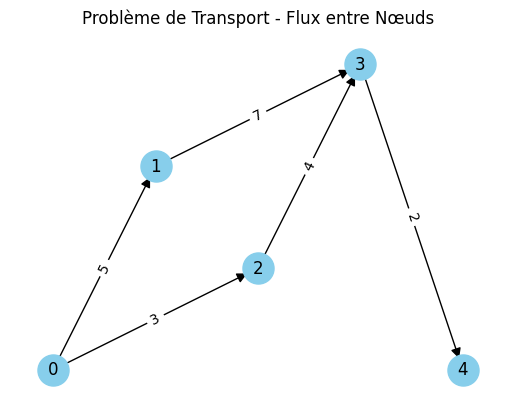

In [ ]:
import matplotlib.pyplot as plt

# Récupérer les positions des nœuds pour la visualisation
positions = nx.get_node_attributes(G, 'pos')

# Dessiner les nœuds
nx.draw_networkx_nodes(G, pos=positions, node_size=500, node_color='skyblue')

# Dessiner les labels des nœuds
nx.draw_networkx_labels(G, pos=positions)

# Dessiner les arêtes avec des flèches
nx.draw_networkx_edges(G, pos=positions, arrowstyle='-|>', arrowsize=15)

# Ajouter des labels aux arêtes (par exemple, les flux transportés)
edge_labels = nx.get_edge_attributes(G, 'flux')
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels)

# Afficher le graphique
plt.title("Problème de Transport - Flux entre Nœuds")
plt.axis('off')
plt.show()

Solution optimale des flux :
[[5. 1. 2. 0.]
 [0. 3. 0. 2.]]

Coût total minimal : 23.0


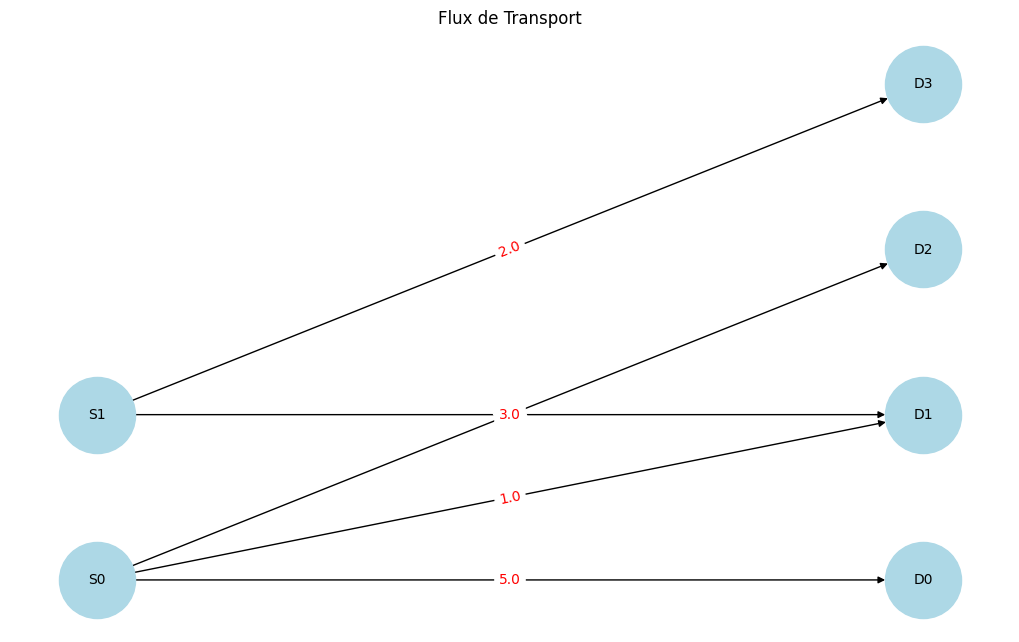

In [5]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import networkx as nx

# Exemple de matrice des coûts (entrepôts x clients)
cost = np.array([
    [2, 3, 1, 4],
    [3, 2, 5, 1]
])

# Capacités des entrepôts
supply = [8, 5]

# Demandes des clients
demand = [5, 4, 2, 2]

# Dimensions
m, n = len(supply), len(demand)

# Aplatir la matrice des coûts
c = cost.flatten()

# Construire la matrice des contraintes pour les entrepôts
A_supply = np.zeros((m, m * n))
for i in range(m):
    A_supply[i, i * n:(i + 1) * n] = 1  # Contraintes des entrepôts

# Construire la matrice des contraintes pour les clients
A_demand = np.zeros((n, m * n))
for j in range(n):
    A_demand[j, j::n] = 1  # Contraintes des clients

# Combiner les contraintes
A_eq = np.vstack([A_supply, A_demand])

# Vecteur des contraintes
b_eq = np.concatenate([supply, demand])

# Résoudre le problème de transport
res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=(0, None), method='highs')

# Reshape de la solution pour retrouver la structure de la matrice des flux
solution = res.x.reshape((m, n))

# Afficher la solution optimale et le coût total
print("Solution optimale des flux :")
print(solution)
print("\nCoût total minimal :", res.fun)

# Visualisation des flux avec networkx
def plot_transport_network(solution, supply, demand, cost):
    # Créer un graphe orienté
    G = nx.DiGraph()

    # Ajouter les nœuds (entrepôts et clients)
    for i in range(len(supply)):
        G.add_node(f"S{i}", pos=(0, i), label=f"Supply {i} ({supply[i]})")
    for j in range(len(demand)):
        G.add_node(f"D{j}", pos=(1, j), label=f"Demand {j} ({demand[j]})")

    # Ajouter les arêtes avec les flux
    for i in range(len(supply)):
        for j in range(len(demand)):
            if solution[i, j] > 0:  # Ajouter seulement les flux non nuls
                G.add_edge(f"S{i}", f"D{j}", weight=solution[i, j], cost=cost[i, j])

    # Obtenir les positions des nœuds
    pos = nx.get_node_attributes(G, 'pos')

    # Tracer le graphe
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels={k: f"{v:.1f}" for k, v in labels.items()},
        font_color='red'
    )
    plt.title("Flux de Transport")
    plt.show()


# Appeler la fonction pour visualiser le graphe
plot_transport_network(solution, supply, demand, cost)
